In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# input file path
input_path = "/content/drive/My Drive/Colab Notebooks/preprocessed_output.txt"

# Read the text from the file and remove newline characters
with open(input_path, 'r') as file:
    text = [line.rstrip() for line in file.readlines()]

# Create a DataFrame with the text
result_df = pd.DataFrame({'Text': text})

# removing quotation marks
result_df['Text'] = result_df['Text'].str.replace('"', '')

print(f"length of extracted text is {len(result_df)}")

length of extracted text is 197587


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# calculating polarity score
result_df['scores'] = result_df['Text'].apply(lambda text: analyzer.polarity_scores(text)) # took approximately 55 seconds
result_df.head()

,Text,scores
0,yeah sad liked,"{'neg': 0.383, 'neu': 0.0, 'pos': 0.617, 'comp..."
1,sad hear rest peace,"{'neg': 0.36, 'neu': 0.233, 'pos': 0.407, 'com..."
2,sad one even care,"{'neg': 0.373, 'neu': 0.241, 'pos': 0.386, 'co..."
3,perioddd,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,someone hated twitter account,"{'neg': 0.583, 'neu': 0.417, 'pos': 0.0, 'comp..."


In [ ]:
# call out compound in separated column
result_df['compound']  = result_df['scores'].apply(lambda score_dict: score_dict['compound'])
result_df.head()

,Text,scores,compound
0,yeah sad liked,"{'neg': 0.383, 'neu': 0.0, 'pos': 0.617, 'comp...",0.2263
1,sad hear rest peace,"{'neg': 0.36, 'neu': 0.233, 'pos': 0.407, 'com...",0.1027
2,sad one even care,"{'neg': 0.373, 'neu': 0.241, 'pos': 0.386, 'co...",0.0258
3,perioddd,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
4,someone hated twitter account,"{'neg': 0.583, 'neu': 0.417, 'pos': 0.0, 'comp...",-0.6369


In [ ]:
result_df['sentiment'] = result_df['compound'].apply(lambda c: 'Positive' if c >=0.05 else ('Neutral' if -0.05 <= c <= 0.05 else 'Negative'))
result_df.head()

,Text,scores,compound,sentiment
0,yeah sad liked,"{'neg': 0.383, 'neu': 0.0, 'pos': 0.617, 'comp...",0.2263,Positive
1,sad hear rest peace,"{'neg': 0.36, 'neu': 0.233, 'pos': 0.407, 'com...",0.1027,Positive
2,sad one even care,"{'neg': 0.373, 'neu': 0.241, 'pos': 0.386, 'co...",0.0258,Neutral
3,perioddd,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
4,someone hated twitter account,"{'neg': 0.583, 'neu': 0.417, 'pos': 0.0, 'comp...",-0.6369,Negative


In [ ]:
# export the csv
df_copy_export = result_df.copy().drop(columns=["scores"], axis=1)

df_copy_export.to_csv('/content/drive/My Drive/Colab Notebooks/preprocessed_combined_data_with_vader_sentiment_analysis.csv', index=False)

In [ ]:
# how's the proportion of each sentiment class in the dataset?

result_df['sentiment'].value_counts()

Negative    125650
Positive     49376
Neutral      22561
Name: sentiment, dtype: int64

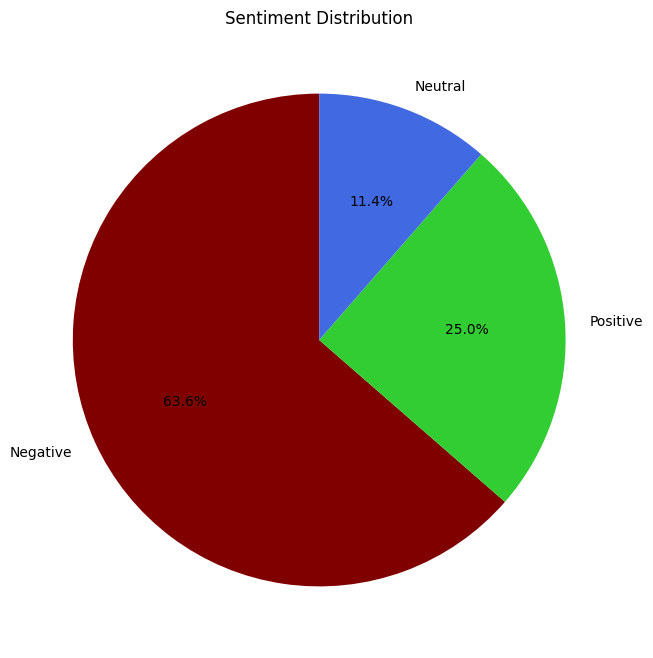

In [ ]:
# Calculate class percentages
class_percentages = result_df['sentiment'].value_counts(normalize=True) * 100

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(class_percentages, labels=class_percentages.index, autopct='%1.1f%%', startangle=90, colors=['maroon', 'limegreen', 'royalblue'])
plt.title('Sentiment Distribution')
plt.show()

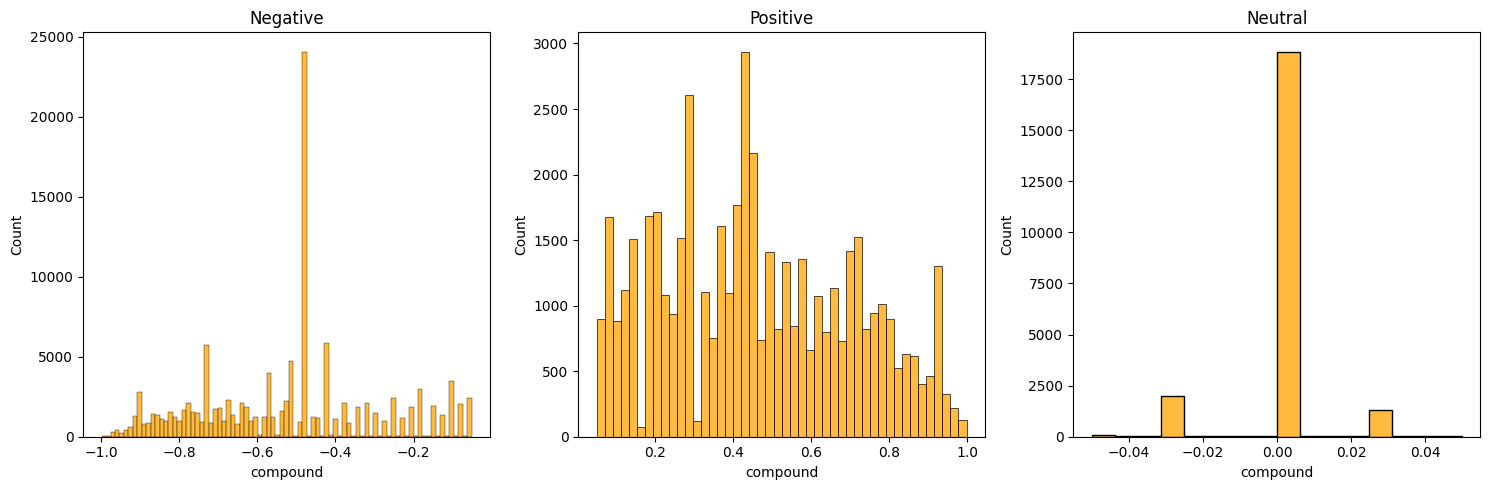

In [ ]:
# Define polarity categories
categories = ['Negative', 'Positive', 'Neutral']

# Create a figure and axes for each category
fig, axes = plt.subplots(1, len(categories), figsize=(15, 5))

# Iterate over categories and plot histogram for each
for i, category in enumerate(categories):
    sns.histplot(result_df['compound'][result_df['sentiment'] == category], kde=False, color="orange", ax=axes[i])
    axes[i].set_title(category)

plt.tight_layout()
plt.show()

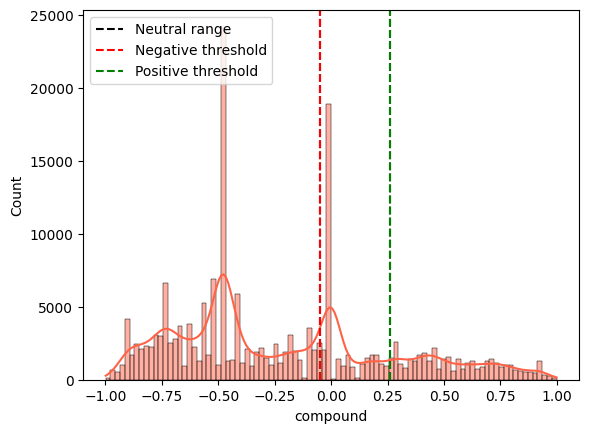

In [ ]:
# Calculate statistics
mean_polarity = np.mean(result_df['compound'])
std_polarity = np.std(result_df['compound'])

# Define threshold
neg_threshold = -0.05
pos_threshold = mean_polarity + std_polarity

# Define the range for neutral
neutral_min = neg_threshold
neutral_max = pos_threshold

# Visualize the distribution of polarity score
sns.histplot(result_df['compound'], kde=True, color="tomato")
plt.axvline(neutral_min, color='black', linestyle='--', label='Neutral range')
plt.axvline(neutral_max, color='black', linestyle='--')
plt.axvline(neg_threshold, color='red', linestyle='--', label='Negative threshold')
plt.axvline(pos_threshold, color='green', linestyle='--', label='Positive threshold')
plt.legend()
plt.show()

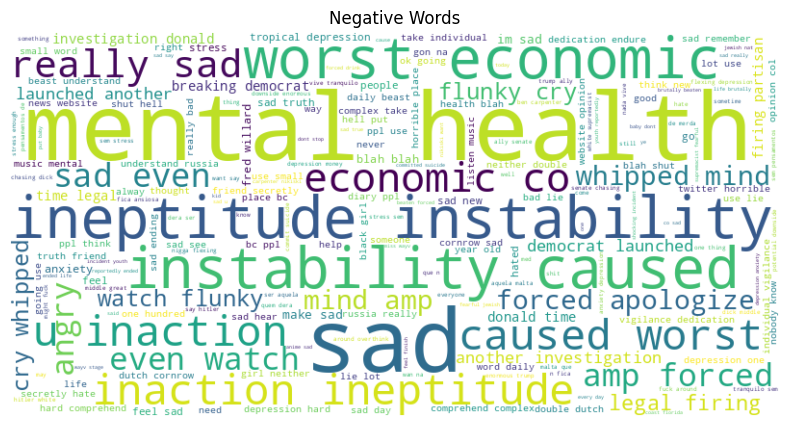

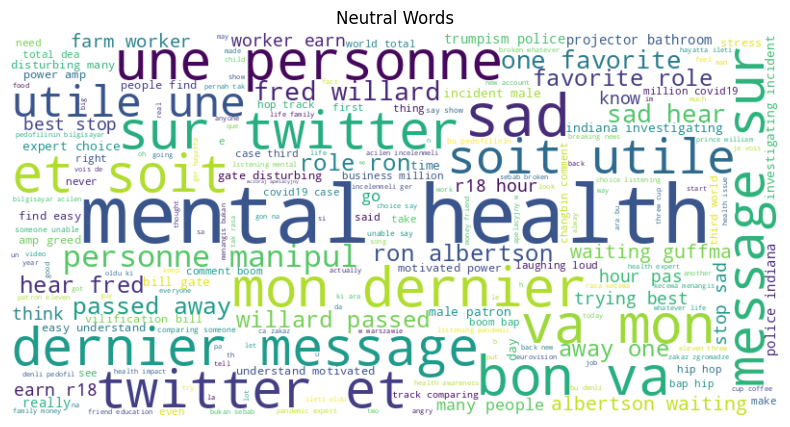

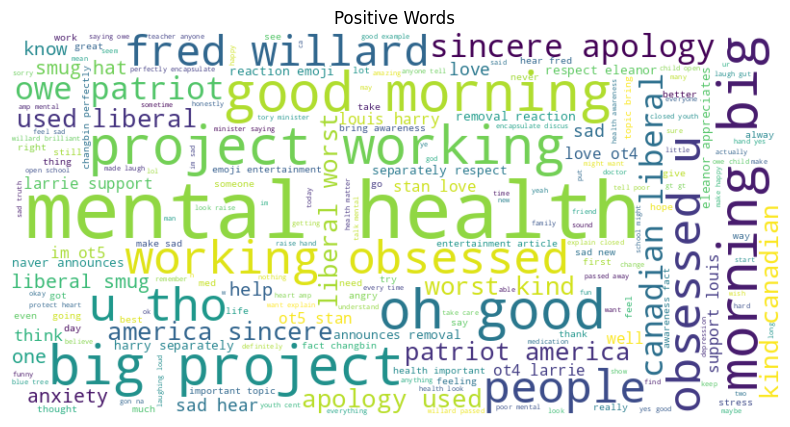

In [ ]:
# word cloud in each sentiment

# Group the DataFrame by category
grouped = result_df.groupby('sentiment')

# Iterate over each category and generate word cloud
for category, group in grouped:

    # Concatenate all tweets in the category into a single string
    all_tweets = ' '.join(tweet for tweet in group['Text'])

    # Generate word cloud for the category
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweets)

    # Display the generated word cloud for the category
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(category + ' Words')
    plt.axis('off')
    plt.show()